In [1]:
using MagneticEquilibria

In [2]:
using PyPlot

In [3]:
# ITER parameters
const R0 =  6.2
const B0 =  5.3
const ϵ  =  0.32
const κ  =  1.8
const δ  =  0.45
const a  = -0.155
const xsep =  0.88
const ysep = -0.60
;

In [4]:
eq = SolovevXpoint(R0, B0, ϵ, κ, δ, a, xsep, ysep)

Solovev Xpoint Equilibrium with
  R₀ = 6.2
  B₀ = 5.3
  ϵ  = 0.32
  κ  = 1.8
  δ  = 0.45
  a  = -0.155

In [5]:
load_equilibrium(eq)

Generating function db₂dx₂
Generating function db₁dx₂
Generating function B₃
Generating function dB₂dx₁
Generating function dBdx₂
Generating function db₃dx₂
Generating function g₃₂
Generating function g₂₂
Generating function dA₃dx₃
Generating function dA₃dx₂
Generating function A₃
Generating function dA₁dx₂
Generating function dB₁dx₃
Generating function B₂
Generating function b₁
Generating function dBdx₃
Generating function dB₁dx₁
Generating function g₂₁
Generating function dBdx₁
Generating function g₂₃
Generating function b₂
Generating function g₁₁
Generating function dA₁dx₁
Generating function dB₂dx₃
Generating function db₁dx₃
Generating function h₃
Generating function dA₂dx₃
Generating function db₃dx₃
Generating function g₁₂
Generating function B
Generating function dA₂dx₂
Generating function dB₃dx₂
Generating function dB₁dx₂
Generating function dB₃dx₁
Generating function dB₂dx₂
Generating function dA₂dx₁
Generating function h₂
Generating function dA₁dx₃
Generating function g₃₃
Gene

In [6]:
nr = 100
nz = 120

120

In [7]:
rgrid = linspace( 3.0,  9.0, nr)
zgrid = linspace(-5.0, +5.0, nz)
;

In [8]:
xgrid = rgrid ./ R0
ygrid = zgrid ./ R0
;

In [9]:
field = zeros((nr,nz))
potAR = zeros((nr,nz))
potAZ = zeros((nr,nz))
potAP = zeros((nr,nz))
;

In [10]:
for i in 1:nr
    for j in 1:nz
        field[i,j] = B(xgrid[i], ygrid[j], 0.0)
        potAR[i,j] = A₁(xgrid[i], ygrid[j], 0.0)
        potAZ[i,j] = A₂(xgrid[i], ygrid[j], 0.0)
        potAP[i,j] = A₃(xgrid[i], ygrid[j], 0.0)
    end
end

In [11]:
# compute separatrix for comparison
τ = linspace(0, 2π, 200)
boundary_X = 1 + ϵ * cos.(τ .+ asin(δ) .* sin.(τ) )
boundary_Y = ϵ * κ * sin.(τ)
;

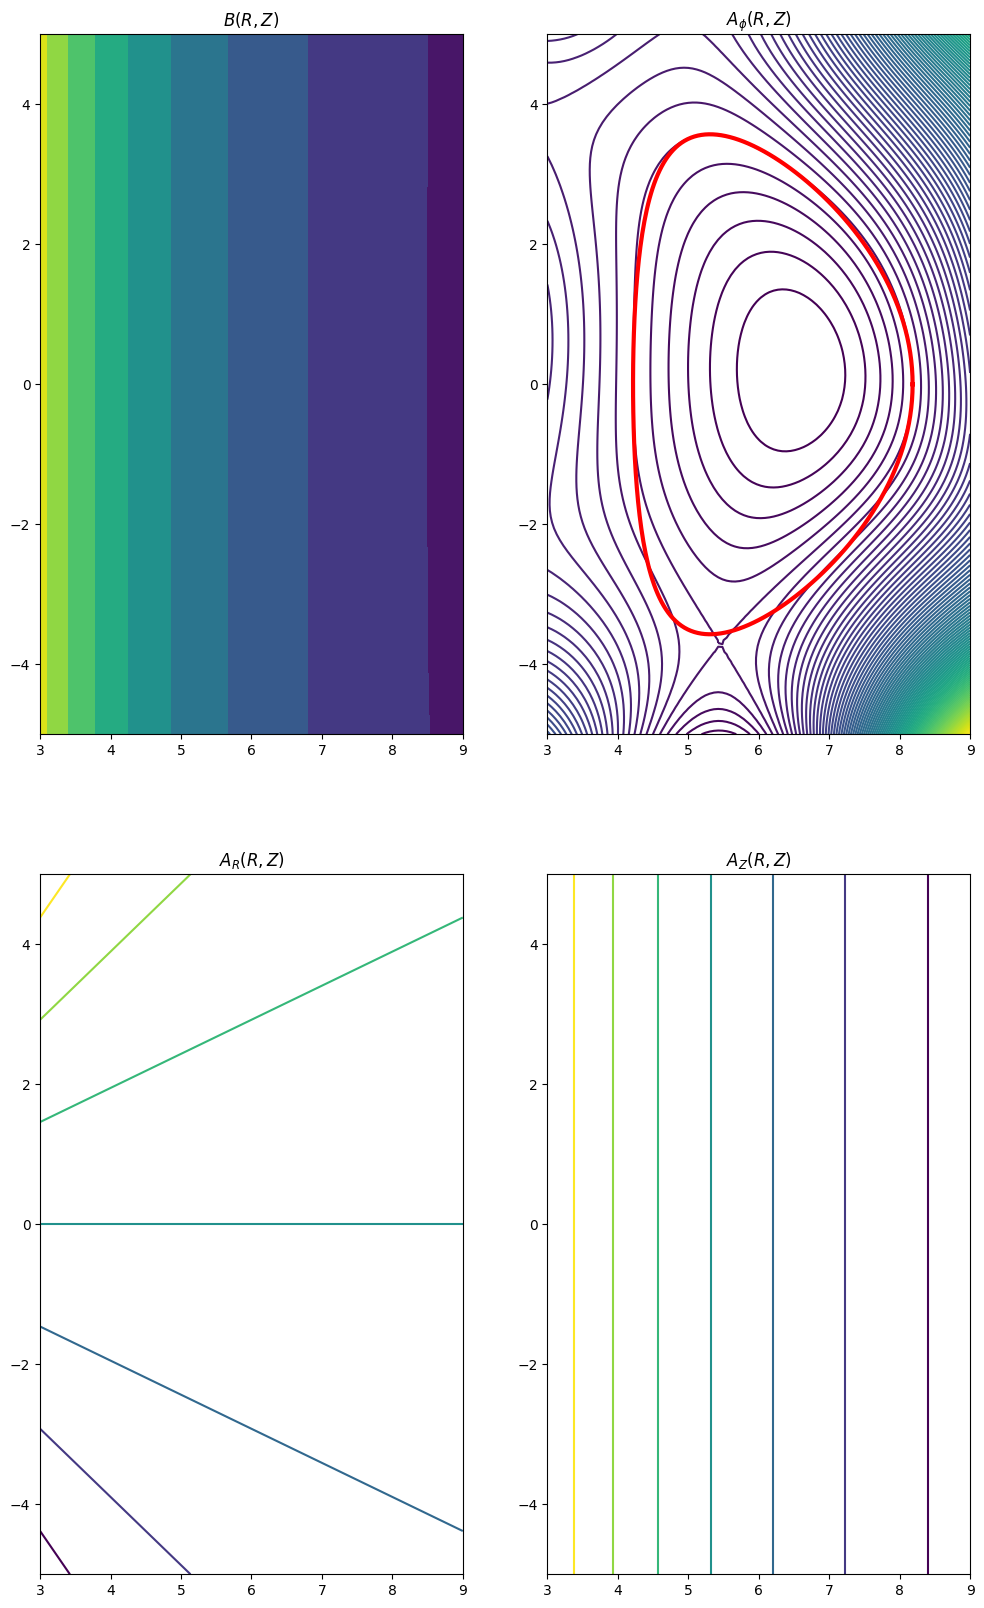

In [12]:
fig, axes = subplots(2, 2, figsize=(12,20))
axes[1,1][:contourf](rgrid, zgrid, field.')
axes[1,2][:contour](rgrid, zgrid, potAP.', 100)
axes[1,2][:plot](boundary_X.*R0, boundary_Y.*R0, "r", lw=3)
axes[2,1][:contour](rgrid, zgrid, potAR.')
axes[2,2][:contour](rgrid, zgrid, potAZ.')
axes[1,1][:set_title](L"$B(R,Z)$")
axes[1,2][:set_title](L"$A_\phi(R,Z)$")
axes[2,1][:set_title](L"$A_R(R,Z)$")
axes[2,2][:set_title](L"$A_Z(R,Z)$")
show()